In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math
import soundfile as sf
import librosa.display
import librosa

from scipy.signal import freqz

In [2]:
# Input signal
N = 600
x = np.zeros((1,N), dtype=float)
fs = 100
ts = 1/fs
f1 = 1

t1 = [t1/fs for t1 in range(0, int(N/3))]
t2 = [t2/fs for t2 in range(int(N/3), int(2*N/3))]
t3 = [t3/fs for t3 in range(int(2*N/3), int(N))]

aux1 = np.multiply(2*math.pi*f1,t1)
aux2 = np.multiply(2*math.pi*f1,t2)
aux3 = np.multiply(2*math.pi*f1,t3)

x1 = np.sin(aux1)
x2 = 2*np.sin(aux2)
x3 = 4*np.sin(aux3)

x = [x1,x2,x3]
x = np.concatenate(x)

In [3]:
# Inputs: LT, AT, RT and delay parameters
lt = 2
at = 0.3
rt = 0.01
delay = 20

# Intermediate signals
xpeak = 0
g = 1

length_x = len(x)
buffer = np.zeros((delay,1), dtype=float)
y = np.zeros((length_x,1), dtype=float)
final_xpeak = np.zeros((length_x,1), dtype=float)
final_gain = np.zeros((length_x,1), dtype=float)

length_buf = len(buffer)

for n in range(1,(length_x)):
    a = abs(x[n])
    if a > xpeak:
        coeff = at
    else:
        coeff = rt
    xpeak = (1-coeff) * xpeak + coeff * a
    final_xpeak[n] = xpeak
    f = min(1, (lt/xpeak))
    if f < g:
        coeff = at
    else:
        coeff = rt

    g = (1-coeff) * g + coeff * f
    final_gain[n] = g 
    y[n] = g * buffer[length_buf-1]
    buffer = np.append(x[n], buffer[0:delay-1])

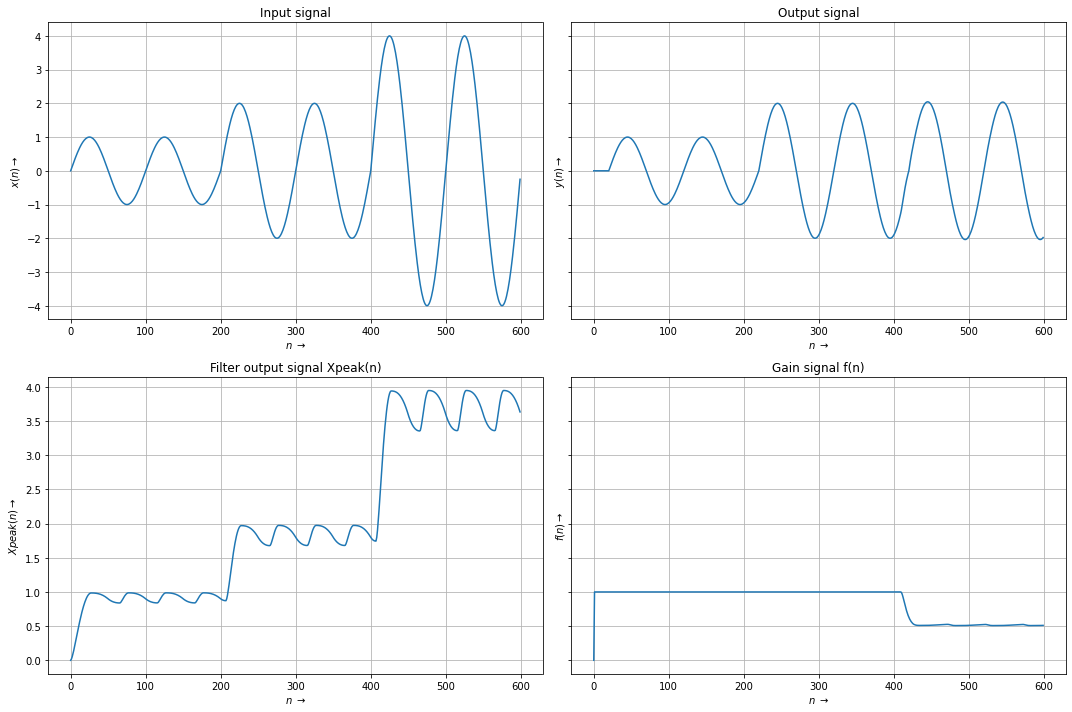

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharey='row', figsize=(15, 10))

plt.subplot(2,2,1)
plt.plot(range(N),x)
plt.xlabel(r"$n$ $\rightarrow$" )
plt.ylabel(r"$x(n) \rightarrow$")
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.title("Input signal")
plt.tight_layout()

plt.subplot(2,2,2)
plt.plot(range(N),y)
plt.xlabel(r"$n$ $\rightarrow$" )
plt.ylabel(r"$y(n) \rightarrow$")
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.title("Output signal")
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(range(N),final_xpeak)
plt.xlabel(r"$n$ $\rightarrow$" )
plt.ylabel(r"$Xpeak(n) \rightarrow$")
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.title("Filter output signal Xpeak(n)")
plt.tight_layout()

plt.subplot(2,2,4)
plt.plot(range(N),final_gain)
plt.xlabel(r"$n$ $\rightarrow$" )
plt.ylabel(r"$f(n) \rightarrow$")
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.title("Gain signal f(n)")
plt.tight_layout()

plt.savefig("figures/limiter.jpg", dpi=600, bbox_inches='tight')

In [5]:
# Input signal
fs = 44100
x, sr = librosa.load("audios/vocalize.wav", fs)

In [6]:
# Inputs: LT, AT, RT and delay parameters
lt = 0.3
at = 0.3
rt = 0.01
delay = 200
 
# Intermediate signals
xpeak = 0
g = 1
length_x = len(x)
N = length_x
buffer = np.zeros((delay,1), dtype=float)
y = np.zeros((length_x,1), dtype=float)
final_xpeak = np.zeros((length_x,1), dtype=float)
final_gain = np.zeros((length_x,1), dtype=float)
length_buf = len(buffer)

for n in range(1,(length_x)):
    a = abs(x[n])
    if a > xpeak:
        coeff = at
    else:
        coeff = rt

    xpeak = (1-coeff) * xpeak + coeff * a
    final_xpeak[n] = xpeak
    f = min(1, (lt/xpeak))

    if f < g:
        coeff = at
    else:
        coeff = rt

    g = (1-coeff) * g + coeff * f
    final_gain[n] = g 
    y[n] = g * buffer[length_buf-1]
    buffer = np.append(x[n], buffer[0:delay-1])

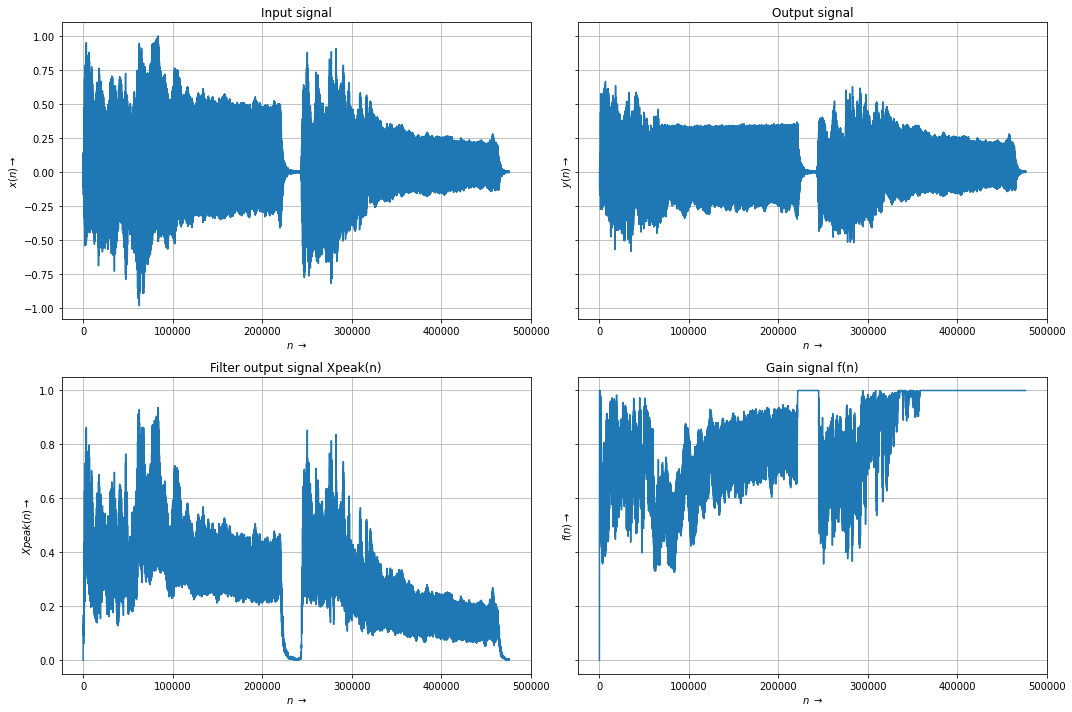

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharey='row', figsize=(15, 10))

plt.subplot(2,2,1)
plt.plot(range(N),x)
plt.xlabel(r"$n$ $\rightarrow$" )
plt.ylabel(r"$x(n) \rightarrow$")
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.title("Input signal")
plt.tight_layout()

plt.subplot(2,2,2)
plt.plot(range(N),y)
plt.xlabel(r"$n$ $\rightarrow$" )
plt.ylabel(r"$y(n) \rightarrow$")
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.title("Output signal")
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(range(N),final_xpeak)
plt.xlabel(r"$n$ $\rightarrow$" )
plt.ylabel(r"$Xpeak(n) \rightarrow$")
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.title("Filter output signal Xpeak(n)")
plt.tight_layout()

plt.subplot(2,2,4)
plt.plot(range(N),final_gain)
plt.xlabel(r"$n$ $\rightarrow$" )
plt.ylabel(r"$f(n) \rightarrow$")
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.title("Gain signal f(n)")
plt.tight_layout()

plt.savefig("figures/limiter_audio.jpg", dpi=600, bbox_inches='tight')

In [8]:
sf.write('audios/vocalize_out.wav', y, fs)